#Introduction to Linear Algebra and the world of probablitites

In this work-sheet, we shall do two activities. First of all we shall check the power of SVD. Then we shall check how may we generate data from an arbitrary distribution (given that we have the ability to generate data from a uniform distribution).

##Singular Value Decomposition
Lets load an image and try to do it's SVD.

Please note the way to access an image from your Google drive. Change the code accordingly (and load an image in your Google drive) to access to your own image!

Mark that we shall be using PIL's Image library, a useful set of powerful algorithms for image processing.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import rasterio
from PIL import Image

In [5]:
# Load the Drive helper and mount
# from google.colab import drive
# drive.mount('/content/drive')

Lets load the image and convert that to a gray-scale version (so that we can treat it just like a 2D matrix). What will happen if its not gray-scale?

Mark how we have used the command $matrix$ to generate a matrix from the image!

In [ ]:
img = Image.open("nature.jpeg")
img = img.convert('L')

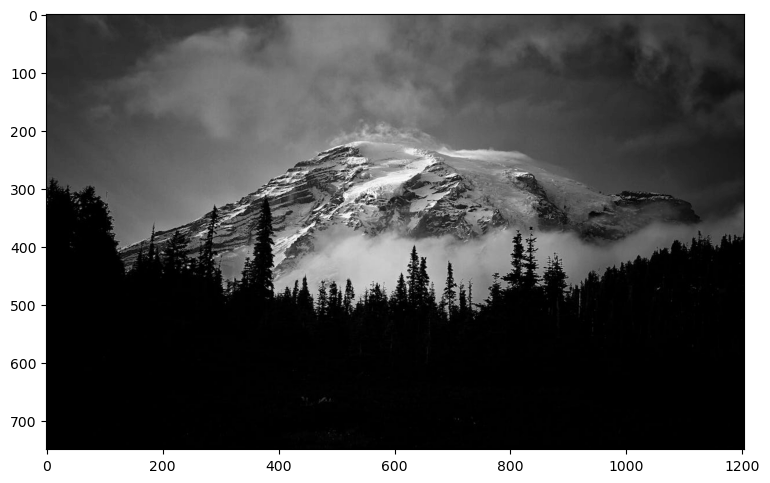

In [ ]:
veg_gray = np.array(list(img.getdata(band=0)), float)
veg_gray.shape = (img.size[1], img.size[0])
veg_gray = np.matrix(veg_gray)
plt.figure(figsize=(9,6))
plt.imshow(veg_gray, cmap='gray')

###SVD

We can directly use the $svd$ command from Numpy to operate SVD on the matrix.

Lets first check how the image will look if we only use a single vector to reconstruct the image.

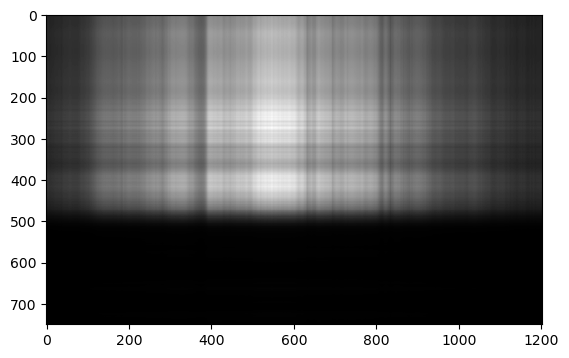

In [ ]:
U, sigma, V = np.linalg.svd(veg_gray)
reconstruction = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstruction, cmap='gray');


Now lets check how does the sigma vector look like.

What do you observe? How many vecotrs can we use to get a decent reconstruction of the image?
What will happen if we omit the first 1-2 vectors (corresponding to the largest eigen values)?

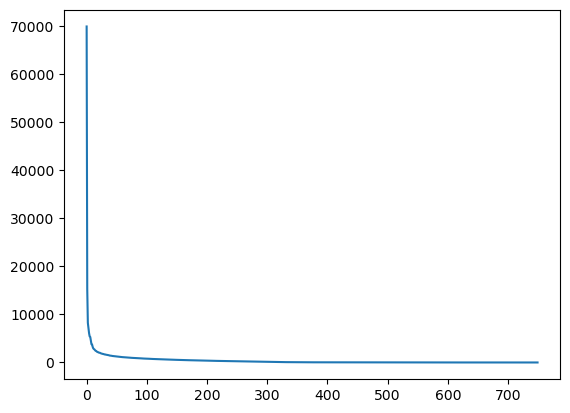

In [5]:
U.shape
sigma.shape
plt.plot(sigma)

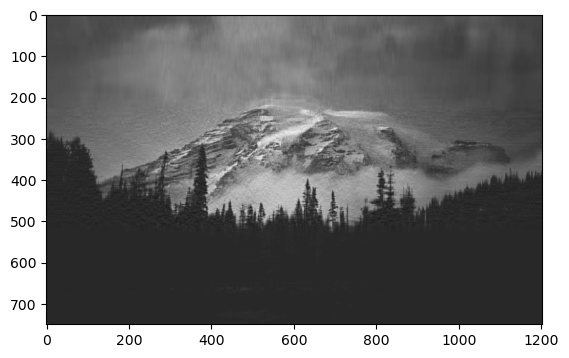

In [ ]:
i = 50
j = 0
reconstruction = np.matrix(U[:, j:i]) * np.diag(sigma[j:i]) * np.matrix(V[j:i, :])
plt.imshow(reconstruction, cmap='gray');

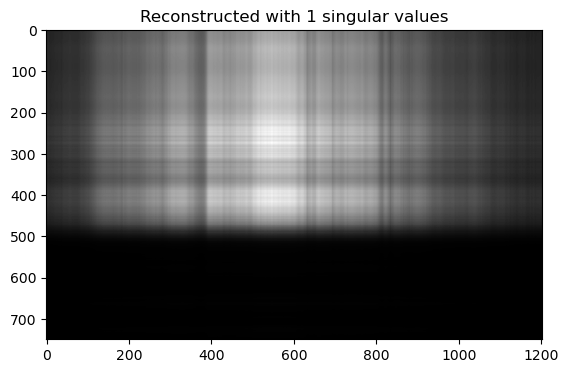

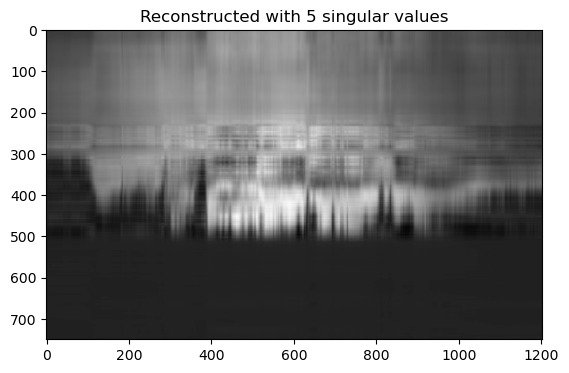

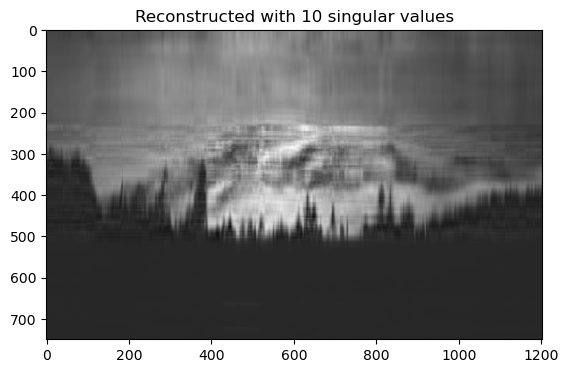

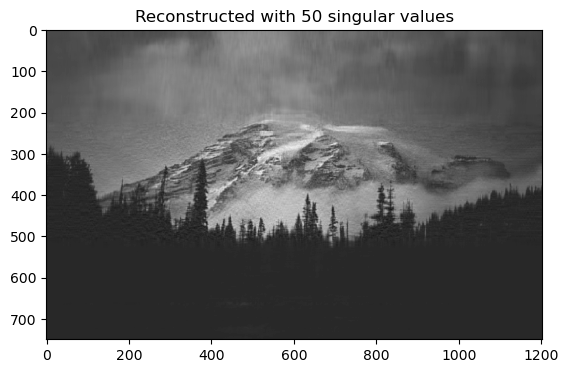

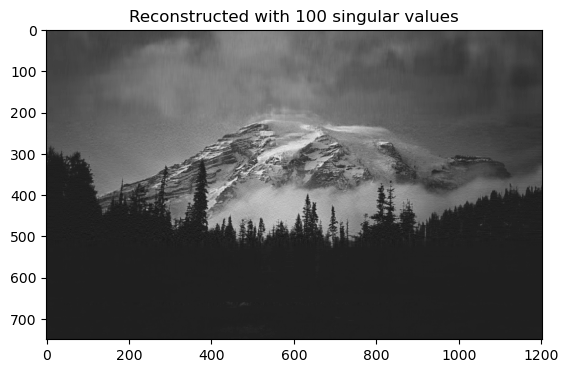

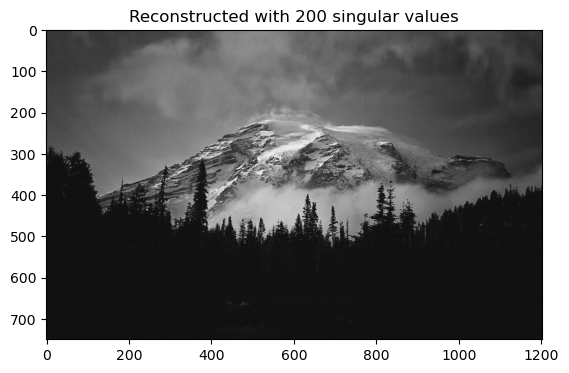

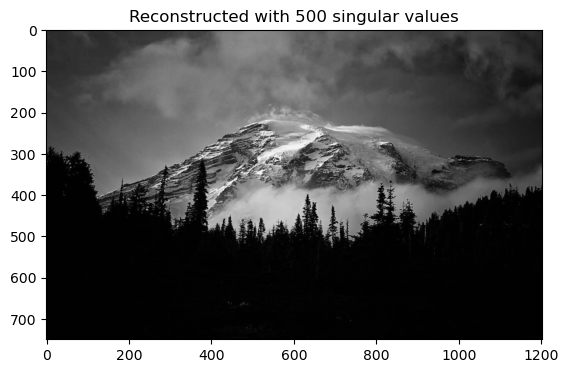

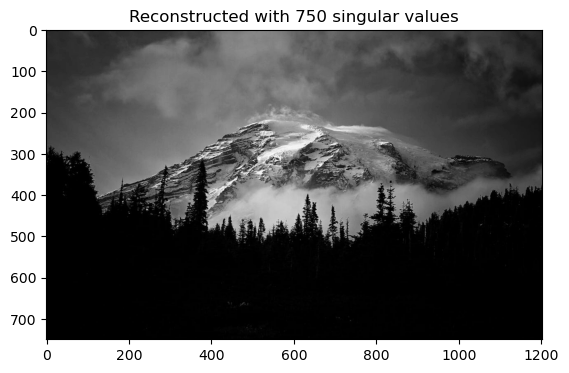

In [9]:
for k in [1, 5, 10, 50, 100, 200, 500, 750]:
    reconst = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    plt.imshow(reconst, cmap='gray')
    plt.title(f'Reconstructed with {k} singular values')
    plt.show()

# urban area

(3, 997, 1968)


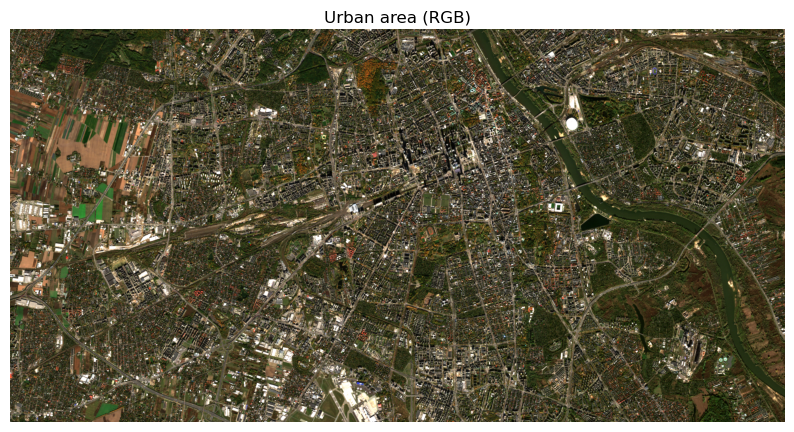

In [ ]:
path = "urban.tif"

with rasterio.open(path) as src:
    urban = src.read()
    meta = src.meta

print(urban.shape)

urban = urban.astype(np.float32)
urban /= np.percentile(urban, 99)
urban = np.clip(urban, 0, 1)

urban_rgb = np.transpose(urban, (1, 2, 0))

plt.figure(figsize=(10, 10))
plt.imshow(urban_rgb)
plt.title("Urban area (RGB)")
plt.axis("off")
plt.show()

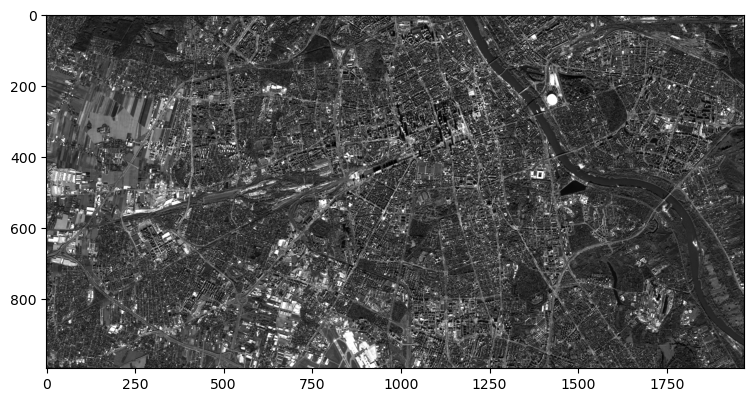

In [34]:
rgb_uint8 = (urban_rgb * 255).astype(np.uint8)
img = Image.fromarray(rgb_uint8)
img = img.convert('L')

urban_gray = np.array(list(img.getdata(band=0)), float)
urban_gray.shape = (img.size[1], img.size[0])
urban_gray = np.matrix(urban_gray)
plt.figure(figsize=(9,6))
plt.imshow(urban_gray, cmap='gray')

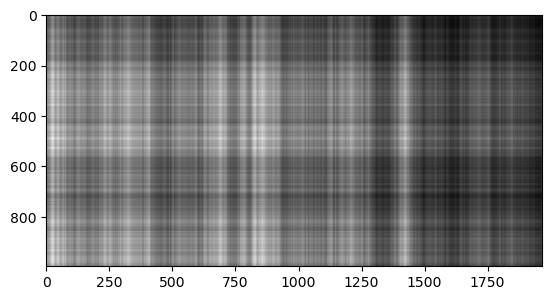

In [35]:
U, sigma, V = np.linalg.svd(urban_gray)
reconstruction = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstruction, cmap='gray');

(997, 997)
(997,)


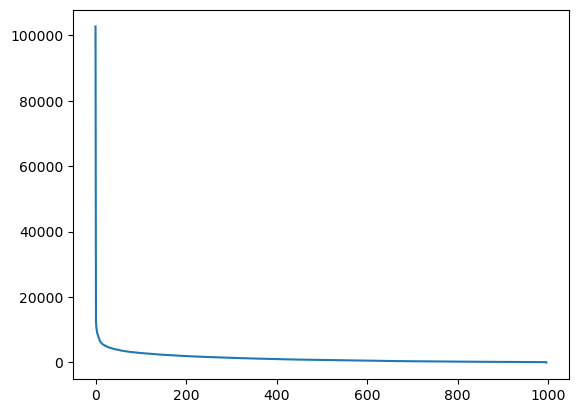

In [36]:
print(U.shape)
print(sigma.shape)
plt.plot(sigma)

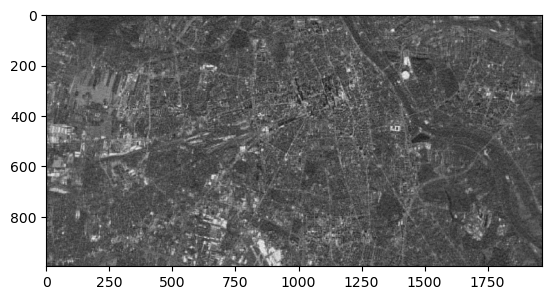

In [40]:
i = 100
j = 0
reconstruction = np.matrix(U[:, j:i]) * np.diag(sigma[j:i]) * np.matrix(V[j:i, :])
plt.imshow(reconstruction, cmap='gray')

# vegetation area

(3, 1049, 2071)


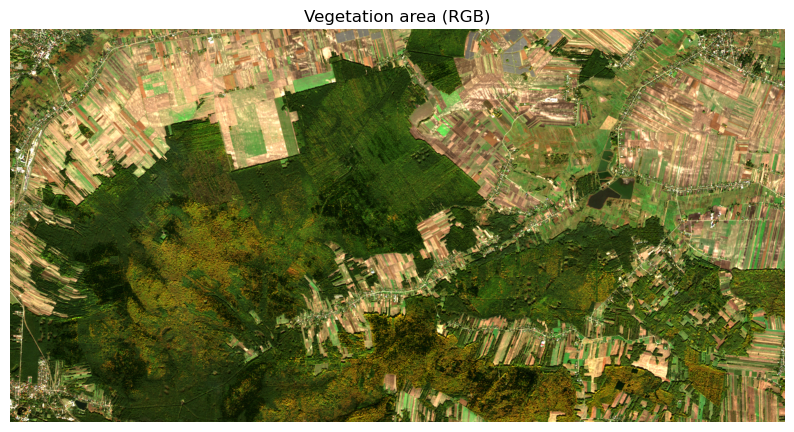

In [41]:
import rasterio

path = "vegetation.tif"

with rasterio.open(path) as src:
    veg = src.read()
    meta = src.meta

print(veg.shape)

veg = veg.astype(np.float32)
veg /= np.percentile(veg, 99)
veg = np.clip(veg, 0, 1)

veg_rgb = np.transpose(veg, (1, 2, 0))

plt.figure(figsize=(10, 10))
plt.imshow(veg_rgb)
plt.title("Vegetation area (RGB)")
plt.axis("off")
plt.show()


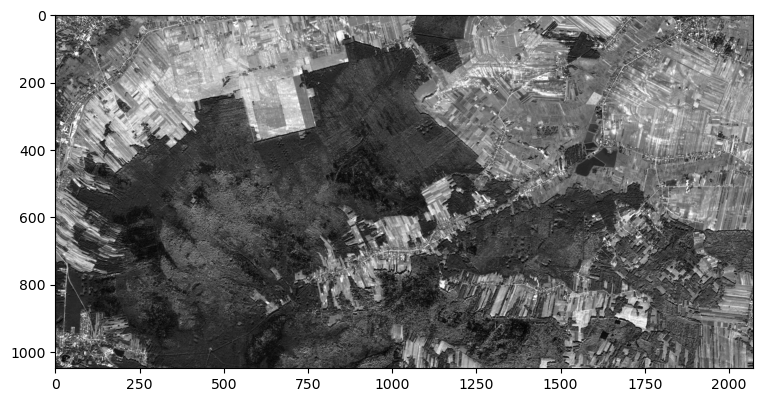

In [42]:
rgb_uint8 = (veg_rgb * 255).astype(np.uint8)
img = Image.fromarray(rgb_uint8)
img = img.convert('L')

veg_gray = np.array(list(img.getdata(band=0)), float)
veg_gray.shape = (img.size[1], img.size[0])
veg_gray = np.matrix(veg_gray)
plt.figure(figsize=(9,6))
plt.imshow(veg_gray, cmap='gray')

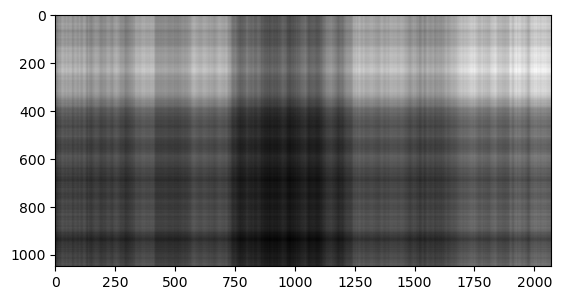

In [43]:
U, sigma, V = np.linalg.svd(veg_gray)
reconstruction = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstruction, cmap='gray')

(1049, 1049)
(1049,)


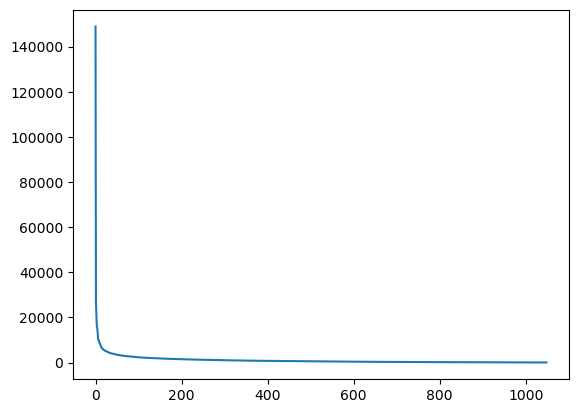

In [44]:
print(U.shape)
print(sigma.shape)
plt.plot(sigma)

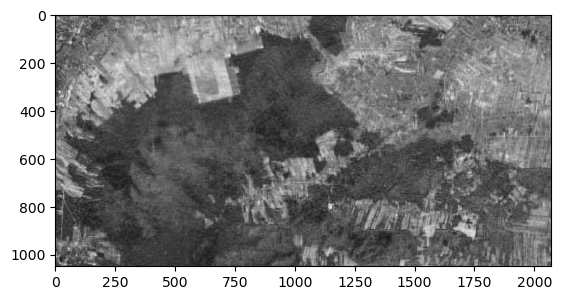

In [47]:
i = 70
j = 0
reconstruction = np.matrix(U[:, j:i]) * np.diag(sigma[j:i]) * np.matrix(V[j:i, :])
plt.imshow(reconstruction, cmap='gray')